In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('car.xlsx')
print(df.head())
print(df.info())
income_median= df.loc[df['INCOME'] != 0, 'INCOME'].median()
df['INCOME'] = df['INCOME'].replace(0, income_median)

home_val_mean = df.loc[df['HOME_VAL'] != 0, 'HOME_VAL'].mean()
df['HOME_VAL'] = df['HOME_VAL'].replace(0, home_val_mean)

age_mean = df.loc[df['AGE'] != 0, 'AGE'].mean()
df['AGE'] = df['AGE'].replace(0, age_mean)

df = df.drop_duplicates()
# Ensure unique ID
df['ID'] = range(1, len(df) + 1)

df['MSTATUS'] = df['MSTATUS'].str.upper()

df['AGE'] = df['AGE'].astype(int)

# Create age groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

df['GENDER'] = df['GENDER'].str.upper().str.strip()

invalid_genders = df[~df['GENDER'].isin(['M', 'F'])]
gender_mode = df.loc[df['GENDER'] != 0, 'GENDER'].mode()[0]
df['GENDER'] = df['GENDER'].replace(0, gender_mode)
df.to_excel('cleaned_dataset.xlsx', index=False)


          ID  KIDSDRIV  AGE  HOMEKIDS         INCOME PARENT1  HOME_VAL  \
0   63581743         0   60         0   67349.000000      No       0.0   
1  921317019         0   48         0   52881.000000      No       0.0   
2  727598473         0   35         1   16039.000000      No  124191.0   
3  450221861         0   51         0   48341.379771      No  306251.0   
4  743146596         0   50         0  114986.000000      No  243925.0   

  MSTATUS GENDER    EDUCATION  ... TIF  CAR_TYPE OLDCLAIM  CLM_FREQ  REVOKED  \
0      No      M          PhD  ...  11   Minivan     4461         2       No   
1      No      M    Bachelors  ...   1       Van        0         0       No   
2     Yes      F  High School  ...   4       SUV    38690         2       No   
3     Yes      M  High School  ...   7   Minivan        0         0       No   
4     Yes      F          PhD  ...   1       SUV    19217         2      Yes   

  MVR_PTS  CLM_AMT  CAR_AGE CLAIM_FLAG           URBANICITY  
0       3   

                ID     KIDSDRIV          AGE     HOMEKIDS         INCOME  \
count  6513.000000  6513.000000  6513.000000  6513.000000    6513.000000   
mean   3257.000000     0.170889    44.998311     0.730539   62770.614865   
std    1880.285484     0.506227     8.829648     1.120784   42188.350354   
min       1.000000     0.000000    16.000000     0.000000       7.000000   
25%    1629.000000     0.000000    39.000000     0.000000   32603.000000   
50%    3257.000000     0.000000    45.000000     0.000000   55246.000000   
75%    4885.000000     0.000000    51.000000     1.000000   83380.913717   
max    6513.000000     4.000000    81.000000     5.000000  367030.000000   

            HOME_VAL     TRAVTIME      BLUEBOOK          TIF      OLDCLAIM  \
count    6513.000000  6513.000000   6513.000000  6513.000000   6513.000000   
mean   208355.825836    33.278981  14200.204207     5.317212   3820.097190   
std     79500.428355    15.826154   7498.759857     4.091187   8594.971532   
min

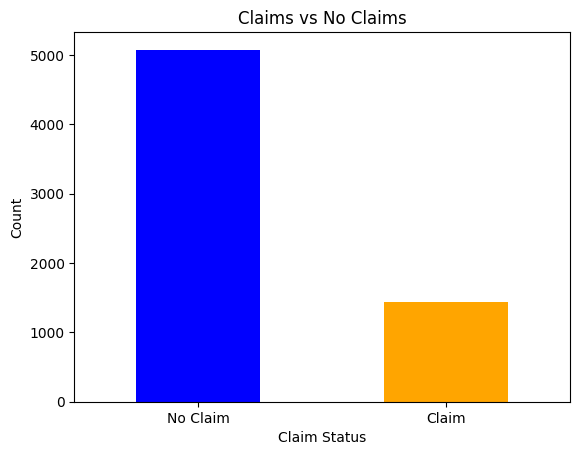

In [ ]:
#information
print(df.describe())

claim_counts = df['CLAIM_FLAG'].value_counts()

claim_counts.index = claim_counts.index.map({1: 'Claim', 0: 'No Claim'})

claim_counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Claims vs No Claims')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




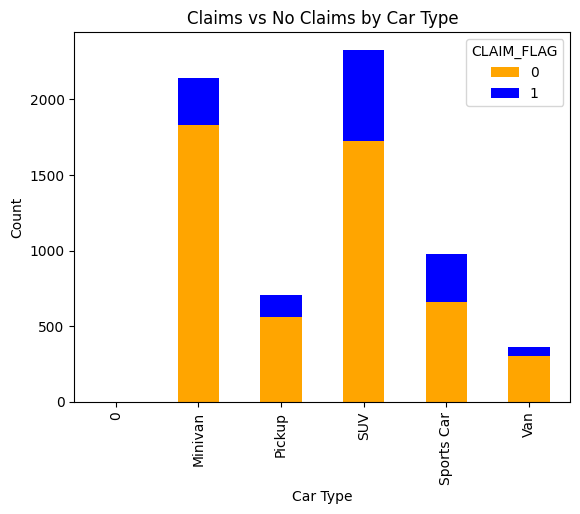

In [ ]:
claim_by_car_type = df.groupby(['CAR_TYPE', 'CLAIM_FLAG']).size().unstack(fill_value=0)

claim_by_car_type.plot(kind='bar', stacked=True, color=['orange', 'blue'])

plt.title('Claims vs No Claims by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.show()



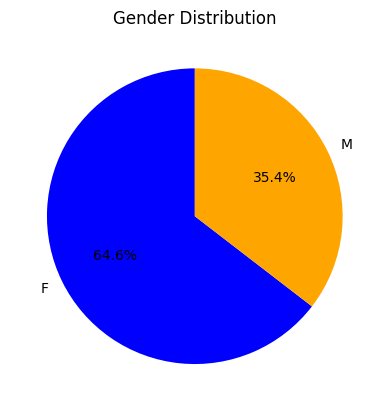

In [ ]:
gender_counts = df['GENDER'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Gender Distribution')
plt.show()

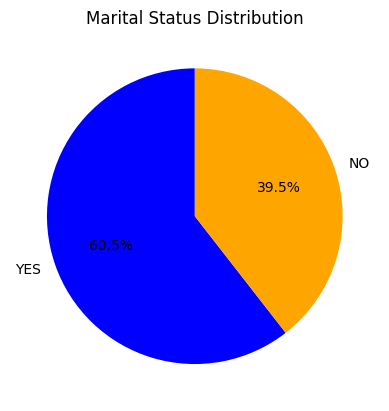

In [ ]:
mstatus_counts = df['MSTATUS'].value_counts()
plt.pie(mstatus_counts, labels=mstatus_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Marital Status Distribution')
plt.show()

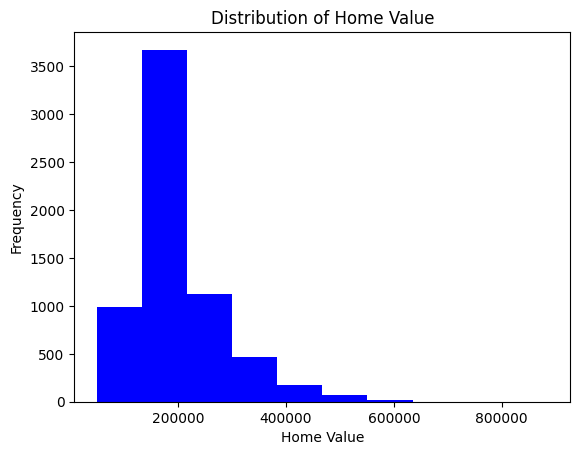

In [ ]:
plt.hist(df['HOME_VAL'], bins=10, color='blue')
plt.title('Distribution of Home Value')
plt.xlabel('Home Value')
plt.ylabel('Frequency')

plt.show()

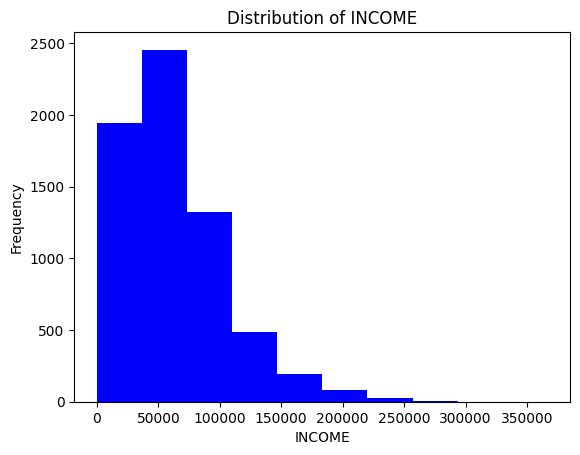

In [ ]:
plt.hist(df['INCOME'], bins=10, color='blue')
plt.title('Distribution of INCOME')
plt.xlabel('INCOME')
plt.ylabel('Frequency')

plt.show()